In [37]:
import pandas as pd
import numpy as np

In [38]:
df1 = pd.read_csv("dataset/dataset0121.csv")

In [39]:

df1


,Unnamed: 0,State,Year,Rape,Kidnap And Assault,Dowry Deaths,Assault against women,Assault against modesty of women,Domestic violence,Women Trafficking
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0
...,...,...,...,...,...,...,...,...,...,...
731,731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
732,732,Daman & Diu,2021,315,904,16,1851,10,501,1
733,733,Delhi UT,2021,2,1,0,5,1,9,0
734,734,Lakshadweep,2021,0,0,0,1,1,3,0


In [40]:
df1.drop('Unnamed: 0',axis=1,inplace=True)
df1

,State,Year,Rape,Kidnap And Assault,Dowry Deaths,Assault against women,Assault against modesty of women,Domestic violence,Women Trafficking
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,ASSAM,2001,817,1070,59,850,4,1248,0
3,BIHAR,2001,888,518,859,562,21,1558,83
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0
...,...,...,...,...,...,...,...,...,...
731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
732,Daman & Diu,2021,315,904,16,1851,10,501,1
733,Delhi UT,2021,2,1,0,5,1,9,0
734,Lakshadweep,2021,0,0,0,1,1,3,0


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   State                             736 non-null    object
 1   Year                              736 non-null    int64 
 2   Rape                              736 non-null    int64 
 3   Kidnap And Assault                736 non-null    int64 
 4   Dowry Deaths                      736 non-null    int64 
 5   Assault against women             736 non-null    int64 
 6   Assault against modesty of women  736 non-null    int64 
 7   Domestic violence                 736 non-null    int64 
 8   Women Trafficking                 736 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 51.9+ KB


In [42]:
df1['State'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'LAKSHADWEEP', 'PUDUCHERRY', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A & N Islands', 'Chandigarh', 'D&N Haveli',
  

In [43]:
df1.loc[df1['State'] == 'A&N Islands', 'State'] = 'A & N ISLANDS'
df1.loc[df1['State'] == 'D&N Haveli', 'State'] = 'D & N HAVELI'
df1.loc[df1['State'] == 'Delhi UT', 'State'] = 'DELHI'

df1['State'] = pd.Series(str.upper(i) for i in df1['State'])
# df1['DISTRICT'] = pd.Series(str.upper(i) for i in df1['DISTRICT'])

In [44]:
df1['State'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'LAKSHADWEEP', 'PUDUCHERRY', 'TELANGANA', 'DELHI'],
      dtype=object)

In [45]:
df1

,State,Year,Rape,Kidnap And Assault,Dowry Deaths,Assault against women,Assault against modesty of women,Domestic violence,Women Trafficking
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,ASSAM,2001,817,1070,59,850,4,1248,0
3,BIHAR,2001,888,518,859,562,21,1558,83
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0
...,...,...,...,...,...,...,...,...,...
731,D & N HAVELI,2021,1250,4083,141,2068,417,4731,4
732,DAMAN & DIU,2021,315,904,16,1851,10,501,1
733,DELHI,2021,2,1,0,5,1,9,0
734,LAKSHADWEEP,2021,0,0,0,1,1,3,0


In [46]:
state_all_crimes_1 = df1.groupby('State').sum()
# state_all_crimes_1
state_all_crimes_1.drop('Year',axis=1,inplace=True)
state_all_crimes_1

,Rape,Kidnap And Assault,Dowry Deaths,Assault against women,Assault against modesty of women,Domestic violence,Women Trafficking
State,,,,,,,
A & N ISLANDS,424,363,13,558,135,365,10
ANDHRA PRADESH,23424,21707,8165,92084,54684,188511,2548
ARUNACHAL PRADESH,1153,1272,4,1584,97,705,7
ASSAM,32190,71462,2757,47115,2698,135415,343
BIHAR,21006,77687,24428,9953,800,55187,825
CHANDIGARH,795,1547,68,954,281,1689,7
CHHATTISGARH,25178,16536,1797,33310,4382,16381,103
D & N HAVELI,2343,7148,256,3977,840,7349,12
DAMAN & DIU,619,1725,30,3642,58,912,29


In [47]:
col_list_1= list(state_all_crimes_1)                                         
state_all_crimes_1[col_list_1] = state_all_crimes_1[col_list_1].apply(pd.to_numeric, errors='coerce')

# Sum across rows
state_all_crimes_1['Total'] = state_all_crimes_1[col_list_1].sum(axis=1)

all_crimes_1 = state_all_crimes_1

all_crimes_1

,Rape,Kidnap And Assault,Dowry Deaths,Assault against women,Assault against modesty of women,Domestic violence,Women Trafficking,Total
State,,,,,,,,
A & N ISLANDS,424,363,13,558,135,365,10,1868
ANDHRA PRADESH,23424,21707,8165,92084,54684,188511,2548,391123
ARUNACHAL PRADESH,1153,1272,4,1584,97,705,7,4822
ASSAM,32190,71462,2757,47115,2698,135415,343,291980
BIHAR,21006,77687,24428,9953,800,55187,825,189886
CHANDIGARH,795,1547,68,954,281,1689,7,5341
CHHATTISGARH,25178,16536,1797,33310,4382,16381,103,97687
D & N HAVELI,2343,7148,256,3977,840,7349,12,21925
DAMAN & DIU,619,1725,30,3642,58,912,29,7015


In [48]:
total_df=state_all_crimes_1.sum(axis=0).reset_index()
tf=pd.DataFrame(total_df)
tf

,index,0
0,Rape,535702
1,Kidnap And Assault,835023
2,Dowry Deaths,158750
3,Assault against women,1162229
4,Assault against modesty of women,244884
5,Domestic violence,1909978
6,Women Trafficking,21156
7,Total,4867722


In [49]:
tf

,index,0
0,Rape,535702
1,Kidnap And Assault,835023
2,Dowry Deaths,158750
3,Assault against women,1162229
4,Assault against modesty of women,244884
5,Domestic violence,1909978
6,Women Trafficking,21156
7,Total,4867722


In [50]:
import plotly.express as px

sorted_df = state_all_crimes_1.sort_values('Total',ascending=False)
fig = px.bar( x=tf["index"],y=tf[0], color=tf[0], 
             labels={'x': "Crimes", 'y': "Count"}, title="Total Cases", 
             color_continuous_scale='Viridis')
fig.show()


In [51]:
# tf=tf.drop([0])

In [52]:
# tf=tf.drop([8])

In [53]:
import plotly.express as px

sorted_df = state_all_crimes_1.sort_values('Total',ascending=False)
total_df=sorted_df.sum(axis=0).reset_index()
total_df

,index,0
0,Rape,535702
1,Kidnap And Assault,835023
2,Dowry Deaths,158750
3,Assault against women,1162229
4,Assault against modesty of women,244884
5,Domestic violence,1909978
6,Women Trafficking,21156
7,Total,4867722


In [54]:
# test1621 = pd.read_csv("dataset/dataset1621.csv")
# # test1621.reset_index().to_csv("datasetfinal123.csv")
# final = test1621.drop("Unnamed: 0", axis=1).drop("index", axis=1)
# final.to_csv("final.csv")

In [55]:
state_all_crimes = df1.groupby('Year').sum()
state_all_crimes

,State,Rape,Kidnap And Assault,Dowry Deaths,Assault against women,Assault against modesty of women,Domestic violence,Women Trafficking
Year,,,,,,,,
2001,ANDHRA PRADESHARUNACHAL PRADESHASSAMBIHARCHHAT...,15694,13681,6738,33622,9656,49032,114
2002,ANDHRA PRADESHARUNACHAL PRADESHASSAMBIHARCHHAT...,15970,13613,6687,33497,10027,49102,76
2003,ANDHRA PRADESHARUNACHAL PRADESHASSAMBIHARCHHAT...,15357,12499,6078,32450,12220,49492,46
2004,ANDHRA PRADESHARUNACHAL PRADESHASSAMBIHARCHHAT...,17682,14697,6900,33966,9871,56867,89
2005,ANDHRA PRADESHARUNACHAL PRADESHASSAMBIHARCHHAT...,17701,14644,6673,33413,9759,56995,148
2006,ANDHRA PRADESHARUNACHAL PRADESHASSAMBIHARCHHAT...,18725,16348,7481,35899,9822,61400,67
2007,ANDHRA PRADESHARUNACHAL PRADESHASSAMBIHARCHHAT...,20139,19249,7955,37866,10783,74143,61
2008,ANDHRA PRADESHARUNACHAL PRADESHASSAMBIHARCHHAT...,21001,21803,8043,39802,12084,79957,67
2009,ANDHRA PRADESHARUNACHAL PRADESHASSAMBIHARCHHAT...,20928,24086,8242,38159,10891,88263,48


In [56]:
col_list = list(state_all_crimes)
state_all_crimes[col_list] = state_all_crimes[col_list].apply(pd.to_numeric, errors='coerce')
state_all_crimes['Total'] = state_all_crimes[col_list].sum(axis=1)
all_crimes = state_all_crimes.drop(columns=['State'])
all_crimes

,Rape,Kidnap And Assault,Dowry Deaths,Assault against women,Assault against modesty of women,Domestic violence,Women Trafficking,Total
Year,,,,,,,,
2001,15694,13681,6738,33622,9656,49032,114,128537.0
2002,15970,13613,6687,33497,10027,49102,76,128972.0
2003,15357,12499,6078,32450,12220,49492,46,128142.0
2004,17682,14697,6900,33966,9871,56867,89,140072.0
2005,17701,14644,6673,33413,9759,56995,148,139333.0
2006,18725,16348,7481,35899,9822,61400,67,149742.0
2007,20139,19249,7955,37866,10783,74143,61,170196.0
2008,21001,21803,8043,39802,12084,79957,67,182757.0
2009,20928,24086,8242,38159,10891,88263,48,190617.0


In [57]:
all_crimes.loc[2011, 'Assault against women'] = np.nan
all_crimes['Assault against women'] = all_crimes['Assault against women'].astype(float)
all_crimes['Assault against women'].interpolate(inplace=True)
all_crimes


/tmp/ipykernel_4752/3857028000.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Rape,Kidnap And Assault,Dowry Deaths,Assault against women,Assault against modesty of women,Domestic violence,Women Trafficking,Total
Year,,,,,,,,
2001,15694,13681,6738,33622.0,9656,49032,114,128537.0
2002,15970,13613,6687,33497.0,10027,49102,76,128972.0
2003,15357,12499,6078,32450.0,12220,49492,46,128142.0
2004,17682,14697,6900,33966.0,9871,56867,89,140072.0
2005,17701,14644,6673,33413.0,9759,56995,148,139333.0
2006,18725,16348,7481,35899.0,9822,61400,67,149742.0
2007,20139,19249,7955,37866.0,10783,74143,61,170196.0
2008,21001,21803,8043,39802.0,12084,79957,67,182757.0
2009,20928,24086,8242,38159.0,10891,88263,48,190617.0


In [58]:
total_df_1=all_crimes.reset_index()
tf_1=pd.DataFrame(total_df_1)
tf_1

,Year,Rape,Kidnap And Assault,Dowry Deaths,Assault against women,Assault against modesty of women,Domestic violence,Women Trafficking,Total
0,2001,15694,13681,6738,33622.0,9656,49032,114,128537.0
1,2002,15970,13613,6687,33497.0,10027,49102,76,128972.0
2,2003,15357,12499,6078,32450.0,12220,49492,46,128142.0
3,2004,17682,14697,6900,33966.0,9871,56867,89,140072.0
4,2005,17701,14644,6673,33413.0,9759,56995,148,139333.0
5,2006,18725,16348,7481,35899.0,9822,61400,67,149742.0
6,2007,20139,19249,7955,37866.0,10783,74143,61,170196.0
7,2008,21001,21803,8043,39802.0,12084,79957,67,182757.0
8,2009,20928,24086,8242,38159.0,10891,88263,48,190617.0
9,2010,21665,28055,8248,40012.0,9881,92637,36,200534.0


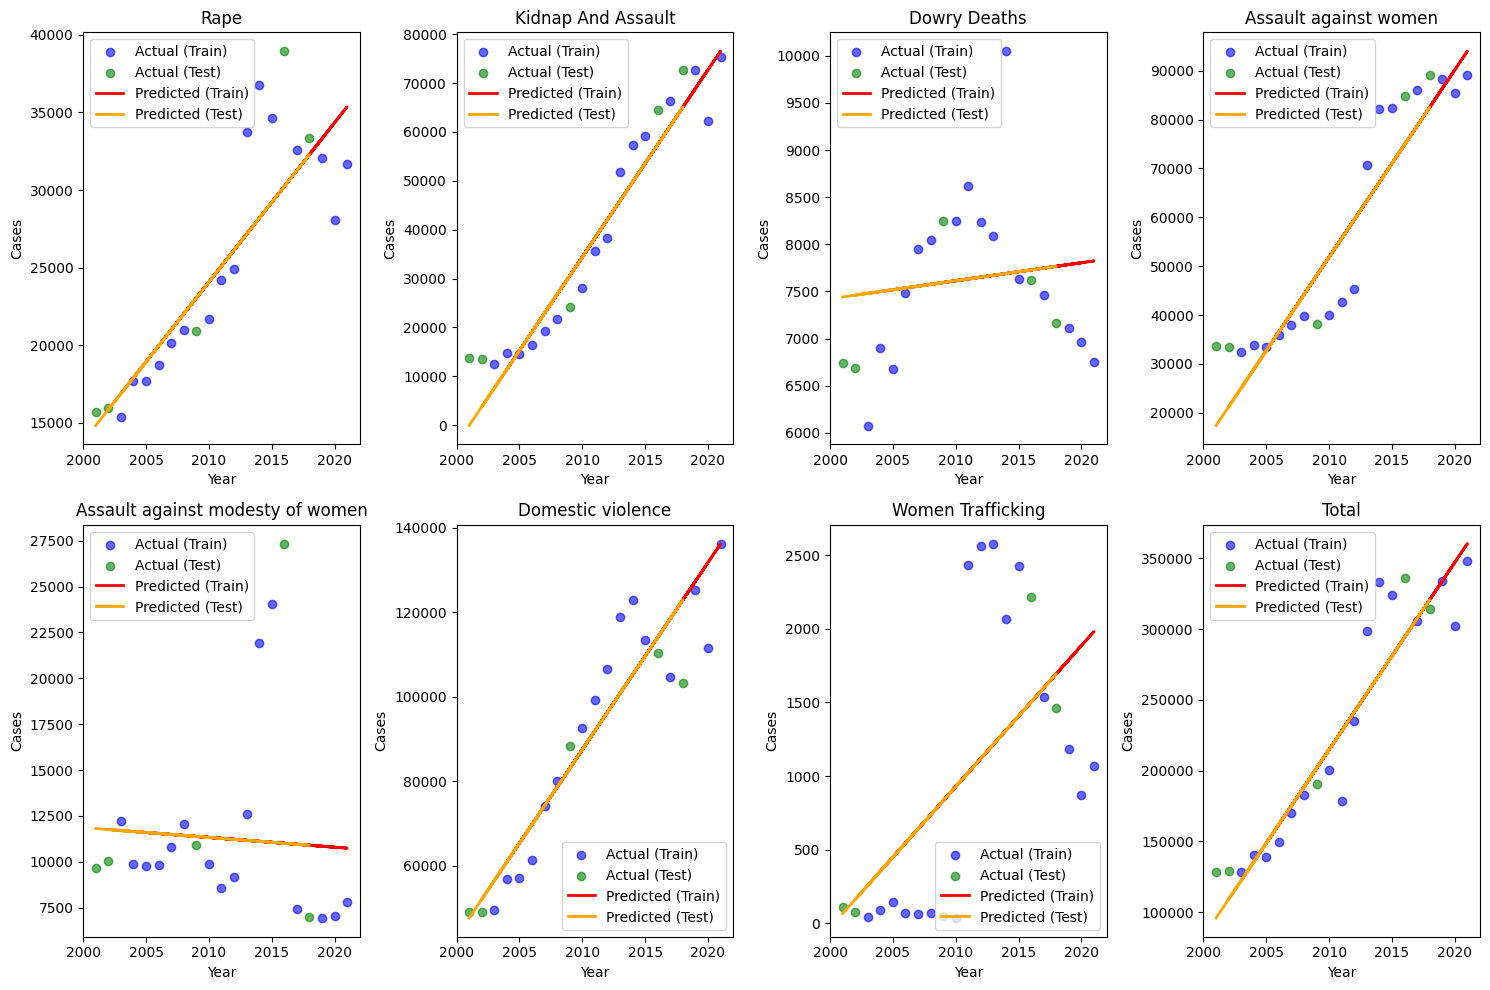

In [59]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

x = tf_1[["Year"]]  
y = tf_1[["Rape", "Kidnap And Assault", "Dowry Deaths", 
        "Assault against women", 
        "Assault against modesty of women", "Domestic violence", 
        "Women Trafficking", "Total"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
    
fig, ax = plt.subplots(2, 4, figsize=(15, 10))

for i, crime_type in enumerate(y.columns):
    row = i // 4
    col = i % 4
    ax[row, col].scatter(x_train, y_train[crime_type], color='blue', label='Actual (Train)', alpha=0.6)
    ax[row, col].scatter(x_test, y_test[crime_type], color='green', label='Actual (Test)', alpha=0.6)
    ax[row, col].plot(x_train, y_train_pred[:, i], color='red', linewidth=2, label='Predicted (Train)')
    ax[row, col].plot(x_test, y_test_pred[:, i], color='orange', linewidth=2, label='Predicted (Test)')
    ax[row, col].set_title(crime_type)
    ax[row, col].set_xlabel('Year')
    ax[row, col].set_ylabel('Cases')
    ax[row, col].legend()

plt.tight_layout()  # Adjust subplots to fit into figure area
plt.show()

In [60]:
model.coef_

array([[ 1026.18221124],
       [ 3832.83150093],
       [   19.11204447],
       [ 3829.94613959],
       [  -53.38480544],
       [ 4429.56256949],
       [   95.76219889],
       [13227.46114886]])

In [61]:
model.intercept_

array([ -2038554.21680049,  -7669581.80358246,    -30801.571958  ,
        -7646314.40642372,    118635.24768376,  -8815971.26868437,
         -191553.83570105, -26372256.4422483 ])

### performance metrics

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
metrics = {
    'Crime Category': [],
    'MAE (Train)': [],
    'MSE (Train)': [],
    'RMSE (Train)': [],
    'R^2 (Train)': [],
    'MAE (Test)': [],
    'MSE (Test)': [],
    'RMSE (Test)': [],
    'R^2 (Test)': []
}

for i, crime_type in enumerate(y.columns):
    metrics['Crime Category'].append(crime_type)
    
    mae_train = mean_absolute_error(y_train[crime_type], y_train_pred[:, i])
    mse_train = mean_squared_error(y_train[crime_type], y_train_pred[:, i])
    rmse_train = np.sqrt(mse_train) 
    r2_train = r2_score(y_train[crime_type], y_train_pred[:, i])
    
    mae_test = mean_absolute_error(y_test[crime_type], y_test_pred[:, i])
    mse_test = mean_squared_error(y_test[crime_type], y_test_pred[:, i])
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test[crime_type], y_test_pred[:, i])
    
    metrics['MAE (Train)'].append(mae_train)
    metrics['MSE (Train)'].append(mse_train)
    metrics['RMSE (Train)'].append(rmse_train)
    metrics['R^2 (Train)'].append(r2_train)
    metrics['MAE (Test)'].append(mae_test)
    metrics['MSE (Test)'].append(mse_test)
    metrics['RMSE (Test)'].append(rmse_test)
    metrics['R^2 (Test)'].append(r2_test)

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

                     Crime Category   MAE (Train)   MSE (Train)  RMSE (Train)  \
0                              Rape   2733.303351  1.360128e+07   3687.991481   
1                Kidnap And Assault   4552.366816  2.622368e+07   5120.906235   
2                      Dowry Deaths    729.872221  8.283485e+05    910.136531   
3             Assault against women   7034.358169  7.080258e+07   8414.427014   
4  Assault against modesty of women   3296.651328  2.263123e+07   4757.229666   
5                 Domestic violence   7966.316306  1.031651e+08  10157.020957   
6                 Women Trafficking    749.205837  7.370942e+05    858.541926   
7                             Total  20281.390797  8.294109e+08  28799.494554   

   R^2 (Train)    MAE (Test)    MSE (Test)   RMSE (Test)  R^2 (Test)  
0     0.709993   2575.056208  1.647766e+07   4059.268511    0.816533  
1     0.946565   8983.024632  8.771025e+07   9365.374941    0.866712  
2     0.013752    566.537641  3.770297e+05    614.027465 

### Statistical test using randomfoest regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_rel

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

y_train_pred_rf = rf_model.predict(x_train)
y_test_pred_rf = rf_model.predict(x_test)


In [64]:
mse_train_lr = mean_squared_error(y_train, y_train_pred)
mse_test_lr = mean_squared_error(y_test, y_test_pred)

mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)

print("Linear Regression MSE on Train Data: ", mse_train_lr/10e7,"e+07")
print("Linear Regression MSE on Test Data: ", mse_test_lr/10e7,"e+07")
print("Random Forest MSE on Train Data: ", mse_train_rf/10e7,"e+07")
print("Random Forest MSE on Test Data: ", mse_test_rf/10e7,"e+07")


Linear Regression MSE on Train Data:  1.3342502273996517 e+07
Linear Regression MSE on Test Data:  1.3121513373981484 e+07
Random Forest MSE on Train Data:  0.14370660956112505 e+07
Random Forest MSE on Test Data:  0.13051253610065017 e+07


In [65]:
import numpy as np

for i, target_name in enumerate(y.columns):
    y_test_pred_target = y_test_pred[:, i]
    y_test_pred_rf_target = y_test_pred_rf[:, i]

    t_stat, p_value = ttest_rel(y_test_pred_target, y_test_pred_rf_target)

    print(f"Results for target: {target_name}")
    print(f"t-statistic: {t_stat}")
    print(f"p-value: {p_value}")

    if p_value < 0.05:
        print("The difference in model performance is statistically significant.\n")
    else:
        print("The difference in model performance is not statistically significant.\n")

Results for target: Rape
t-statistic: -0.7714472204449183
p-value: 0.4834851481642087
The difference in model performance is not statistically significant.

Results for target: Kidnap And Assault
t-statistic: -1.220295101639482
p-value: 0.2893732337579607
The difference in model performance is not statistically significant.

Results for target: Dowry Deaths
t-statistic: 1.2874705982682266
p-value: 0.2673732439937937
The difference in model performance is not statistically significant.

Results for target: Assault against women
t-statistic: -1.5127335509643909
p-value: 0.2048944087741717
The difference in model performance is not statistically significant.

Results for target: Assault against modesty of women
t-statistic: -0.5897236969093648
p-value: 0.5870765086150556
The difference in model performance is not statistically significant.

Results for target: Domestic violence
t-statistic: 0.6665201913456229
p-value: 0.5415541613169534
The difference in model performance is not statistic

### LOOCV

In [66]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

loo = LeaveOneOut()
mse_lr_list = []
mse_rf_list = []

for train_index, test_index in loo.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lr_model = LinearRegression()
    lr_model.fit(x_train, y_train)
    y_test_pred_lr = lr_model.predict(x_test)
    mse_lr = mean_squared_error(y_test, y_test_pred_lr)
    mse_lr_list.append(mse_lr)
    
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(x_train, y_train)
    y_test_pred_rf = rf_model.predict(x_test)
    mse_rf = mean_squared_error(y_test, y_test_pred_rf)
    mse_rf_list.append(mse_rf)

avg_mse_lr = np.mean(mse_lr_list)
avg_mse_rf = np.mean(mse_rf_list)

print(f"Average MSE for Linear Regression (LOOCV): {avg_mse_lr/10e7}e+07")
print(f"Average MSE for Random Forest (LOOCV): {avg_mse_rf/10e7}e+07")


Average MSE for Linear Regression (LOOCV): 1.5357674839588216e+07
Average MSE for Random Forest (LOOCV): 0.7155350529848931e+07


### K fold cross validation

In [67]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
mse_lr_list = []
mse_rf_list = []

for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lr_model = LinearRegression()
    lr_model.fit(x_train, y_train)
    y_test_pred_lr = lr_model.predict(x_test)
    mse_lr = mean_squared_error(y_test, y_test_pred_lr)
    mse_lr_list.append(mse_lr)
    
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(x_train, y_train)
    y_test_pred_rf = rf_model.predict(x_test)
    mse_rf = mean_squared_error(y_test, y_test_pred_rf)
    mse_rf_list.append(mse_rf)

avg_mse_lr = np.mean(mse_lr_list)
avg_mse_rf = np.mean(mse_rf_list)

print(f"Average MSE for Linear Regression: {avg_mse_lr/10e7}e+07")
print(f"Average MSE for Random Forest: {avg_mse_rf/10e7}e+07")


Average MSE for Linear Regression: 1.4672506416362212e+07
Average MSE for Random Forest: 0.75261853459705e+07


### ARIMA testing till 2021

/home/stanley/miniconda3/envs/MLDA/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/stanley/miniconda3/envs/MLDA/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/home/stanley/miniconda3/envs/MLDA/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/stanley/miniconda3/envs/MLDA/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/stanley/miniconda3/envs/MLDA/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA para

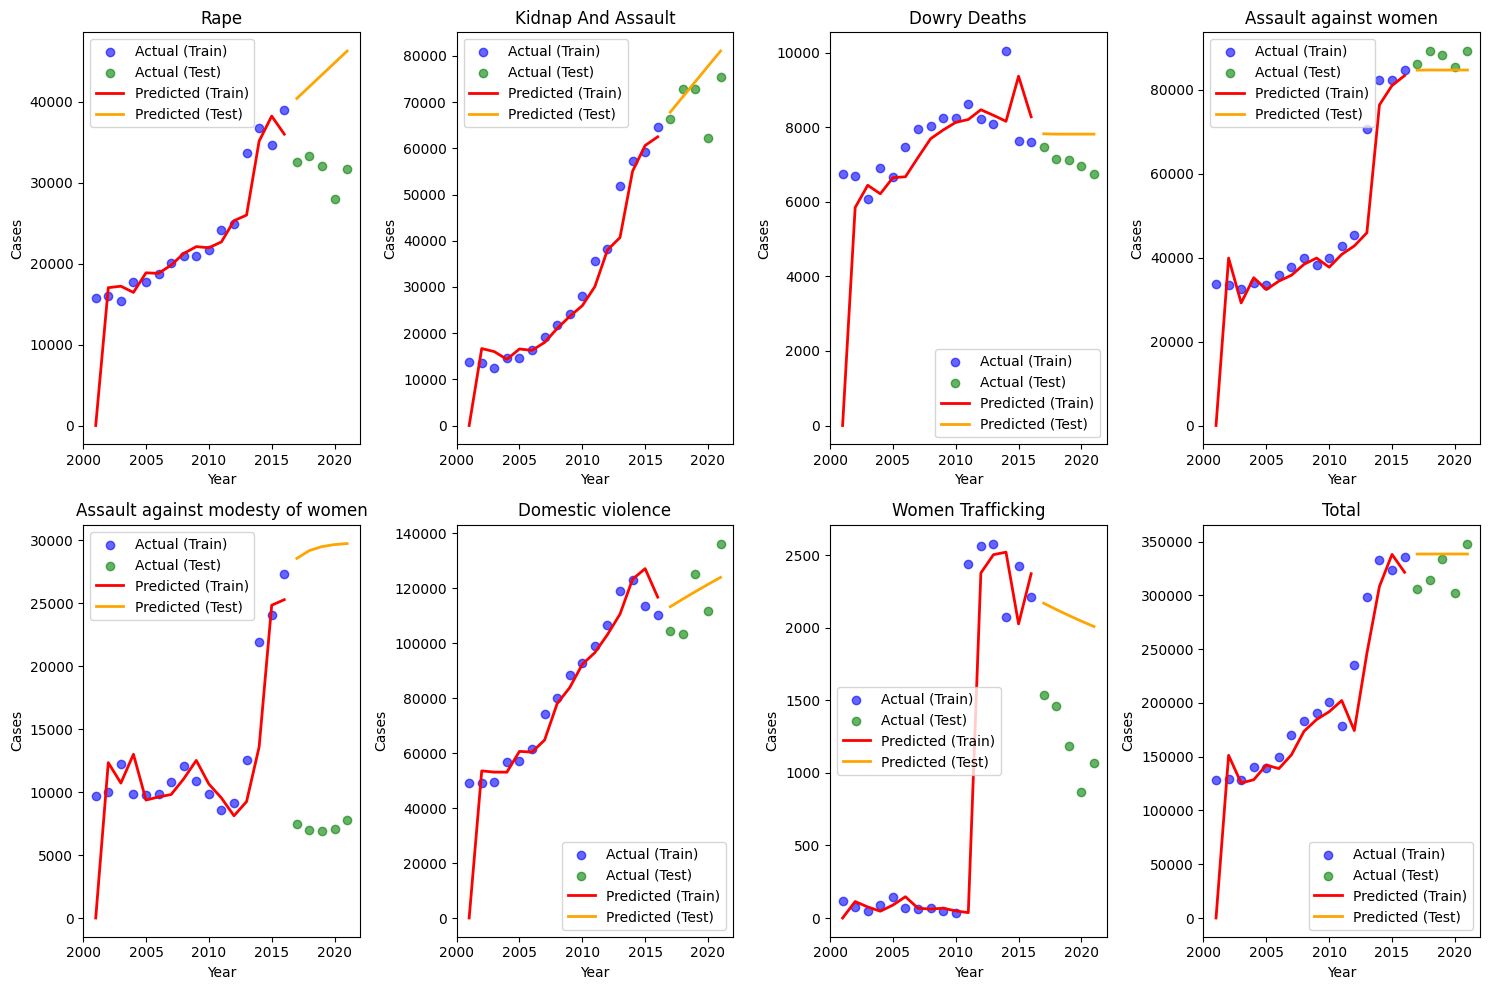

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

crime_types = ["Rape", "Kidnap And Assault", "Dowry Deaths", 
            "Assault against women", 
            "Assault against modesty of women", "Domestic violence", 
            "Women Trafficking", "Total"]

x = tf_1[["Year"]]  
y = tf_1[crime_types]  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=False)

fig, ax = plt.subplots(2, 4, figsize=(15, 10))              

for i, crime_type in enumerate(crime_types):
    row = i // 4  
    col = i % 4  
    

    y_train_crime = y_train[crime_type]
    y_test_crime = y_test[crime_type]
    
    model = ARIMA(y_train_crime, order=(1, 1, 1))  
    model_fit = model.fit()


    y_train_pred = model_fit.fittedvalues
    y_test_pred = model_fit.forecast(steps=len(y_test_crime))

    ax[row, col].scatter(x_train, y_train_crime, color='blue', label='Actual (Train)', alpha=0.6)
    ax[row, col].scatter(x_test, y_test_crime, color='green', label='Actual (Test)', alpha=0.6)
    ax[row, col].plot(x_train, y_train_pred, color='red', linewidth=2, label='Predicted (Train)')
    ax[row, col].plot(x_test, y_test_pred, color='orange', linewidth=2, label='Predicted (Test)')
    
    ax[row, col].set_title(crime_type)
    ax[row, col].set_xlabel('Year')
    ax[row, col].set_ylabel('Cases')
    ax[row, col].legend()

plt.tight_layout()  
plt.show()

### CV on ARIMA

In [69]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming tf_1 is your dataframe
crime_types = ["Rape", "Kidnap And Assault", "Dowry Deaths",
               "Assault against women", "Assault against modesty of women",
               "Domestic violence", "Women Trafficking", "Total"]

def time_series_cv(data, n_splits=5):
    n = len(data)
    k = n // n_splits
    for i in range(n_splits):
        train = data.iloc[:n - (i+1)*k]
        test = data.iloc[n - (i+1)*k:n - i*k]
        yield train, test

mse_scores = {crime_type: [] for crime_type in crime_types}

for crime_type in crime_types:
    y = tf_1[["Year", crime_type]].set_index("Year")
    
    for train, test in time_series_cv(y):
        model = ARIMA(train, order=(1, 1, 1))
        model_fit = model.fit()
        
        forecast = model_fit.forecast(steps=len(test))
        mse = mean_squared_error(test, forecast)
        mse_scores[crime_type].append(mse/10e7)

print("Average MSE scores:")
for crime_type, scores in mse_scores.items():
    avg_mse = np.mean(scores)
    print(f"{crime_type}: {avg_mse:.2f}e+07")

print("\nMSE scores for each fold:")
for crime_type, scores in mse_scores.items():
    print(f"\n{crime_type}:")
    for i, score in enumerate(scores, 1):
        print(f"  Fold {i}: {score:.2f}e+07")   

/home/stanley/miniconda3/envs/MLDA/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/home/stanley/miniconda3/envs/MLDA/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/home/stanley/miniconda3/envs/MLDA/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/home/stanley/miniconda3/envs/MLDA/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will 

Average MSE scores:
Rape: 0.13e+07
Kidnap And Assault: 0.74e+07
Dowry Deaths: 0.01e+07
Assault against women: 0.71e+07
Assault against modesty of women: 0.27e+07
Domestic violence: 2.40e+07
Women Trafficking: 0.01e+07
Total: 8.62e+07

MSE scores for each fold:

Rape:
  Fold 1: 0.19e+07
  Fold 2: 0.13e+07
  Fold 3: 0.29e+07
  Fold 4: 0.02e+07
  Fold 5: 0.02e+07

Kidnap And Assault:
  Fold 1: 0.52e+07
  Fold 2: 0.06e+07
  Fold 3: 2.71e+07
  Fold 4: 0.41e+07
  Fold 5: 0.01e+07

Dowry Deaths:
  Fold 1: 0.00e+07
  Fold 2: 0.01e+07
  Fold 3: 0.00e+07
  Fold 4: 0.02e+07
  Fold 5: 0.00e+07

Assault against women:
  Fold 1: 0.06e+07
  Fold 2: 0.42e+07
  Fold 3: 2.84e+07
  Fold 4: 0.22e+07
  Fold 5: 0.00e+07

Assault against modesty of women:
  Fold 1: 0.12e+07
  Fold 2: 1.16e+07
  Fold 3: 0.03e+07
  Fold 4: 0.03e+07
  Fold 5: 0.02e+07

Domestic violence:
  Fold 1: 2.84e+07
  Fold 2: 5.86e+07
  Fold 3: 0.37e+07
  Fold 4: 2.62e+07
  Fold 5: 0.31e+07

Women Trafficking:
  Fold 1: 0.00e+07
  Fold 2

/home/stanley/miniconda3/envs/MLDA/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/home/stanley/miniconda3/envs/MLDA/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/home/stanley/miniconda3/envs/MLDA/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/home/stanley/miniconda3/envs/MLDA/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use o

### ARIMA till 2024

/home/stanley/miniconda3/envs/MLDA/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/stanley/miniconda3/envs/MLDA/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/home/stanley/miniconda3/envs/MLDA/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/stanley/miniconda3/envs/MLDA/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/stanley/miniconda3/envs/MLDA/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as

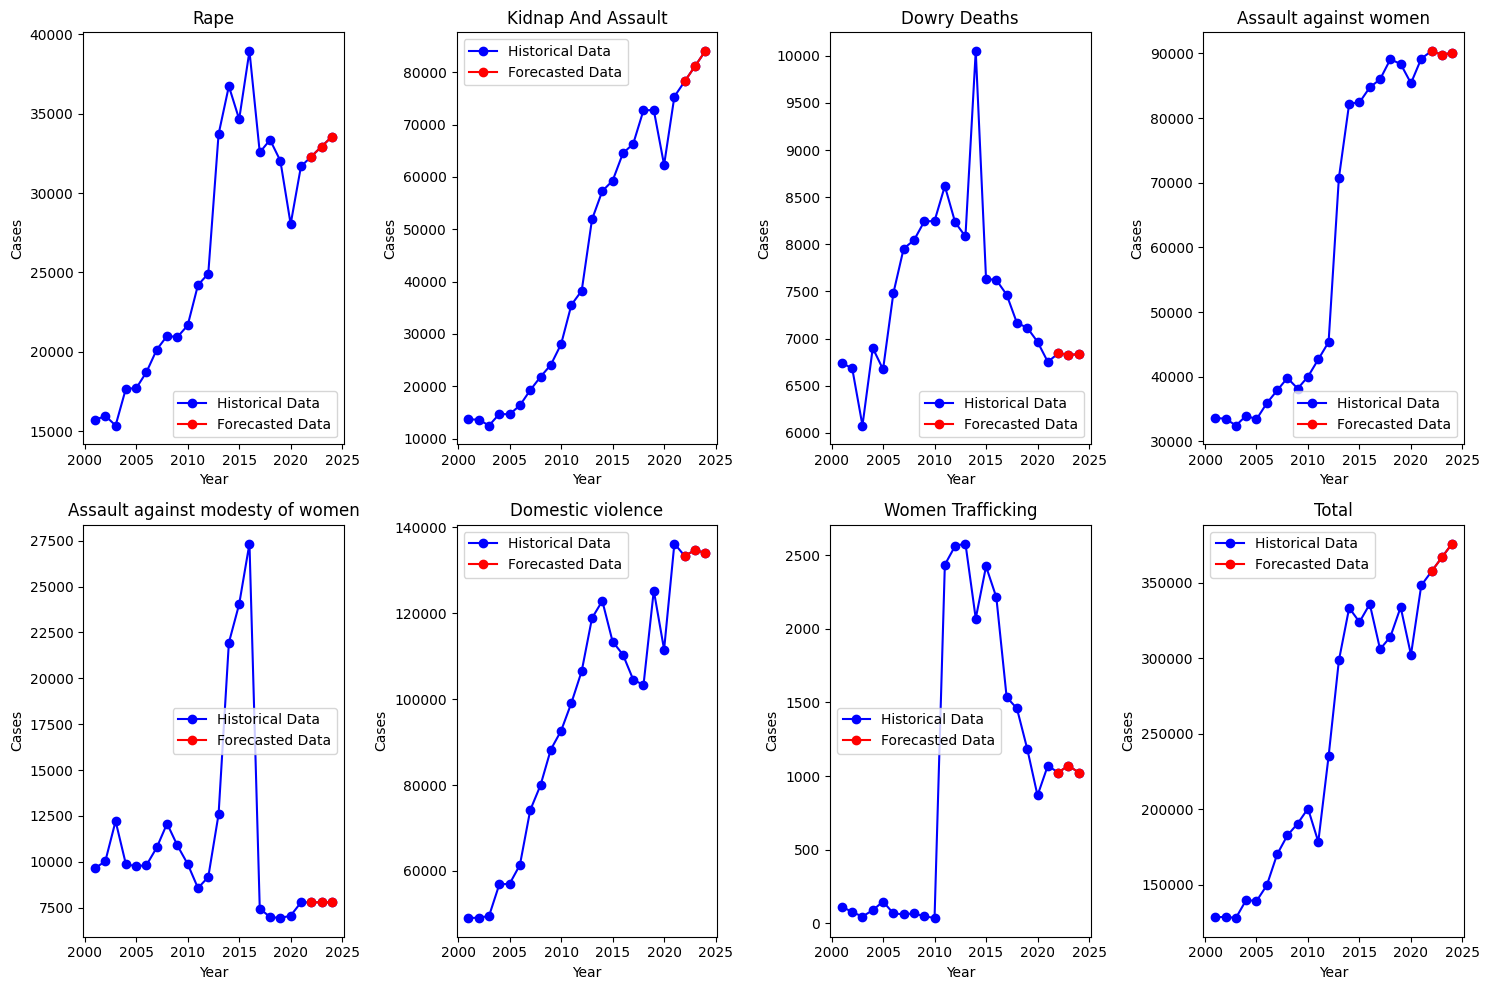

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

crime_types = ["Rape", "Kidnap And Assault", "Dowry Deaths", 
               "Assault against women", 
               "Assault against modesty of women", "Domestic violence", 
               "Women Trafficking", "Total"]

fig, ax = plt.subplots(2, 4, figsize=(15, 10))


for i, crime_type in enumerate(crime_types):
    row = i // 4  
    col = i % 4  
    
    y_full = tf_1[crime_type]

    model = ARIMA(y_full, order=(1, 1, 1))  
    model_fit = model.fit()

    forecast_steps = 3
    y_forecast = model_fit.forecast(steps=forecast_steps)

    future_years = pd.DataFrame({
        'Year': [2022, 2023, 2024],
        crime_type: y_forecast
    }).set_index('Year')

    full_data = pd.concat([tf_1[[crime_type]].set_index(tf_1['Year']), future_years])

    ax[row, col].plot(full_data.index, full_data[crime_type], marker='o', label='Historical Data', color='blue')
    ax[row, col].plot(future_years.index, future_years[crime_type], marker='o', color='red', label='Forecasted Data')

    ax[row, col].set_title(crime_type)              
    ax[row, col].set_xlabel('Year')
    ax[row, col].set_ylabel('Cases')
    ax[row, col].legend()

plt.tight_layout() 
plt.show()              

### Support Vector Regressor

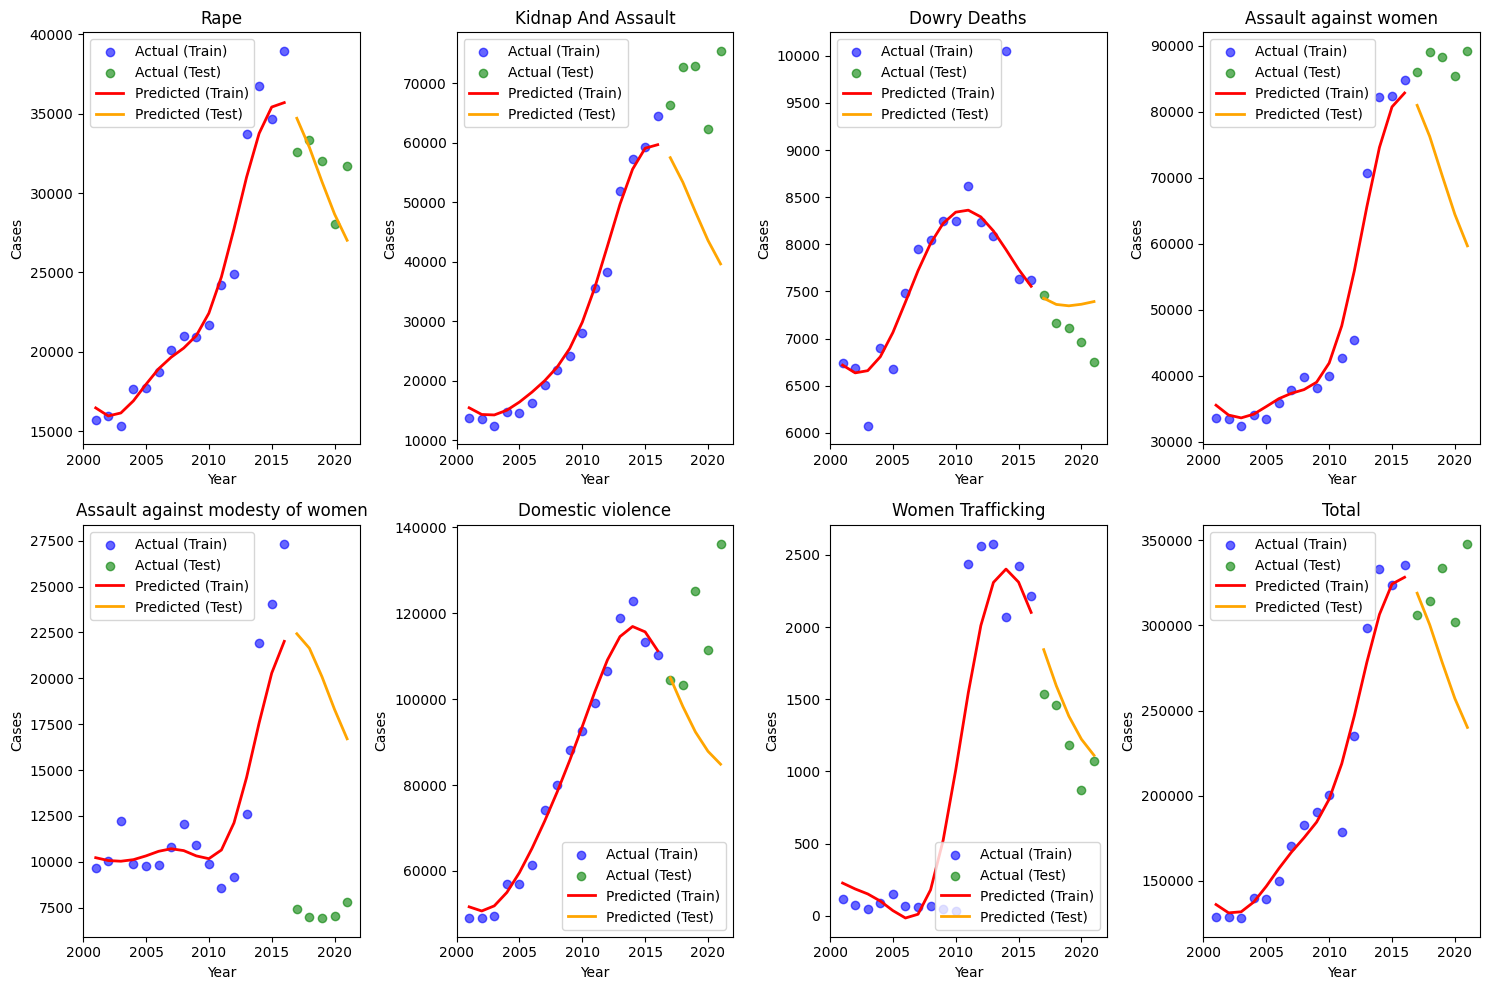

In [71]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = tf_1[["Year"]]  
y = tf_1[["Rape", "Kidnap And Assault", "Dowry Deaths", 
           "Assault against women", 
           "Assault against modesty of women", "Domestic violence", 
           "Women Trafficking", "Total"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=False)

fig, ax = plt.subplots(2, 4, figsize=(15, 10))

for i, crime_type in enumerate(y.columns):
    scaler_x = StandardScaler()
    x_train_scaled = scaler_x.fit_transform(x_train)
    x_test_scaled = scaler_x.transform(x_test)
    
    scaler_y = StandardScaler()
    y_train_scaled = scaler_y.fit_transform(y_train[[crime_type]])
    
    model = SVR(kernel='rbf')
    model.fit(x_train_scaled, y_train_scaled.ravel())  # Use ravel to flatten y_train

    # Make predictions
    y_train_pred_scaled = model.predict(x_train_scaled)
    y_test_pred_scaled = model.predict(x_test_scaled)
    
    y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1))
    y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1))
    
    row = i // 4
    col = i % 4
    ax[row, col].scatter(x_train, y_train[crime_type], color='blue', label='Actual (Train)', alpha=0.6)
    ax[row, col].scatter(x_test, y_test[crime_type], color='green', label='Actual (Test)', alpha=0.6)
    ax[row, col].plot(x_train, y_train_pred, color='red', linewidth=2, label='Predicted (Train)')
    ax[row, col].plot(x_test, y_test_pred, color='orange', linewidth=2, label='Predicted (Test)')
    ax[row, col].set_title(crime_type)
    ax[row, col].set_xlabel('Year')
    ax[row, col].set_ylabel('Cases')
    ax[row, col].legend()

plt.tight_layout() 
plt.show()


### KN Regression       

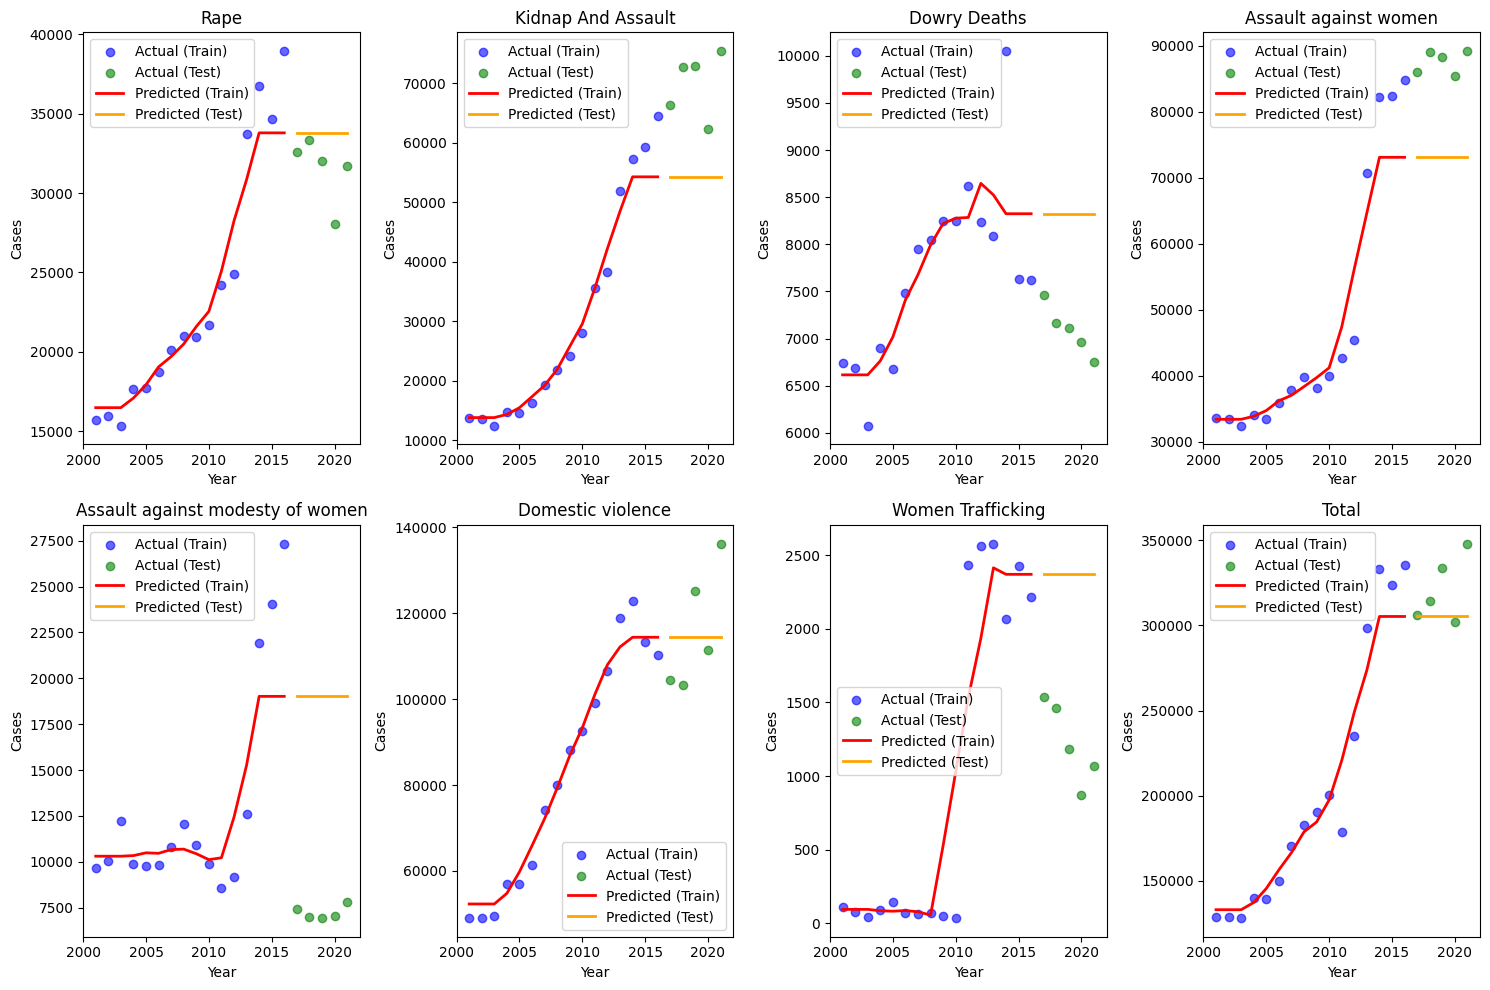

In [72]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
    
x = tf_1[["Year"]]  
y = tf_1[["Rape", "Kidnap And Assault", "Dowry Deaths", 
           "Assault against women", 
           "Assault against modesty of women", "Domestic violence", 
           "Women Trafficking", "Total"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=False)

fig, ax = plt.subplots(2, 4, figsize=(15, 10))

for i, crime_type in enumerate(y.columns):
    scaler_x = StandardScaler()
    x_train_scaled = scaler_x.fit_transform(x_train)
    x_test_scaled = scaler_x.transform(x_test)
    
    scaler_y = StandardScaler()
    y_train_scaled = scaler_y.fit_transform(y_train[[crime_type]])
    
    model = KNeighborsRegressor(n_neighbors=5) 
    model.fit(x_train_scaled, y_train_scaled.ravel())  

    y_train_pred_scaled = model.predict(x_train_scaled)
    y_test_pred_scaled = model.predict(x_test_scaled)
    
    y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1))
    y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1))
                
    row = i // 4
    col = i % 4
    ax[row, col].scatter(x_train, y_train[crime_type], color='blue', label='Actual (Train)', alpha=0.6)
    ax[row, col].scatter(x_test, y_test[crime_type], color='green', label='Actual (Test)', alpha=0.6)
    ax[row, col].plot(x_train, y_train_pred, color='red', linewidth=2, label='Predicted (Train)')
    ax[row, col].plot(x_test, y_test_pred, color='orange', linewidth=2, label='Predicted (Test)')
    ax[row, col].set_title(crime_type)
    ax[row, col].set_xlabel('Year')
    ax[row, col].set_ylabel('Cases')
    ax[row, col].legend()

plt.tight_layout()  
plt.show()


In [1]:
import pandas as pd

# Load the CSV file
file_path = 'dataset/dataset1621.csv'  # Update with your CSV file path
df = pd.read_csv(file_path)

# Reset index to start from 0
df.index = range(len(df))

# Save the updated dataframe back to CSV
df.to_csv('updated_file.csv', index=False)

print("CSV index has been reset to start from 0.")


CSV index has been reset to start from 0.


In [2]:
import pandas as pd

# Load the CSV file
file_path = 'updated_file.csv'  # Update with your CSV file path
df = pd.read_csv(file_path)

# Remove the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

# Reset the index to start from 0 and make it a new column
df.reset_index(drop=False, inplace=True)

# Save the updated dataframe back to CSV
df.to_csv('updated_file.csv', index=False)

print("CSV index has been reset, and a new index column has been added.")


CSV index has been reset and 'Unnamed: 0' column removed.
